# Importing the required libraries

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from tqdm.auto import tqdm
import time

# EDA(Exploratory Data Analysis)

In [3]:
# Load the dataset
data = pd.read_csv('Mountain Analytics IMDB Dataset 1.csv')
d1=pd.read_csv('Mountain Analytics IMDB Dataset 1.csv')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


# 1)Handling Null Values

In [6]:
data.isna().any()#Detect missing values,gives Boolean value True for NA (not-a -number) values, and otherwise False.

review       False
sentiment    False
dtype: bool

In [7]:
data.isna().sum()#returns the number of missing values in each column.

review       0
sentiment    0
dtype: int64

# 2)Handling Duplicate Values

In [8]:
data['review'].nunique()

49582

In [9]:
data.shape

(50000, 2)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [13]:
data['review'].drop_duplicates(inplace = True)

In [14]:
data['review'].nunique()

49582

In [15]:
data.shape

(50000, 2)

In [16]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# 3)Class Distributions

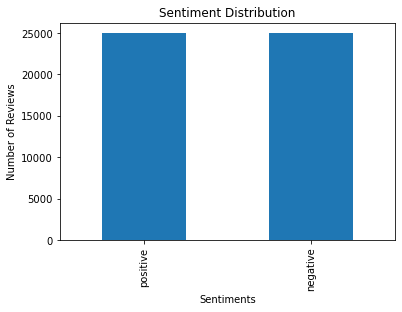

In [17]:
# Create a bar plot of the class distribution
class_counts = data['sentiment'].value_counts()
class_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

In [18]:
for i in range(5):#printing first 5 reviews
    print('Review: ',[i])
    print(data['review'].iloc[i],"\n")
    print('Sentiment: ',data['sentiment'].iloc[i],'\n\n')

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

# 4)Counting Words

In [19]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rikin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rikin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
def no_of_words(text):#takes the text,split it into words and returns the count of words
    words=text.split()
    word_count=len(words)
    return word_count

In [21]:
data['word_count']=data['review'].apply(no_of_words)

In [22]:
data.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


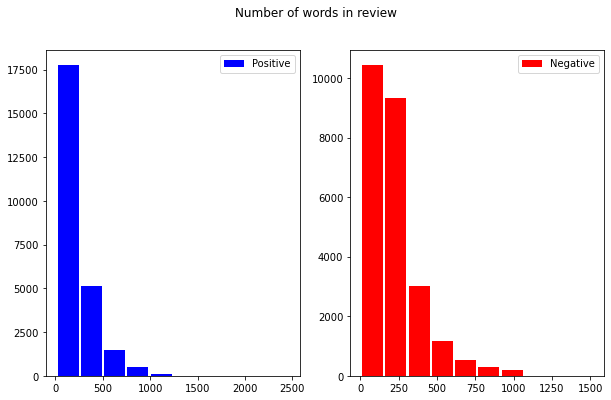

In [23]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(data[data['sentiment']=='positive']['word_count'],label='Positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment']=='negative']['word_count'],label='Negative',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle('Number of words in review')
plt.show()

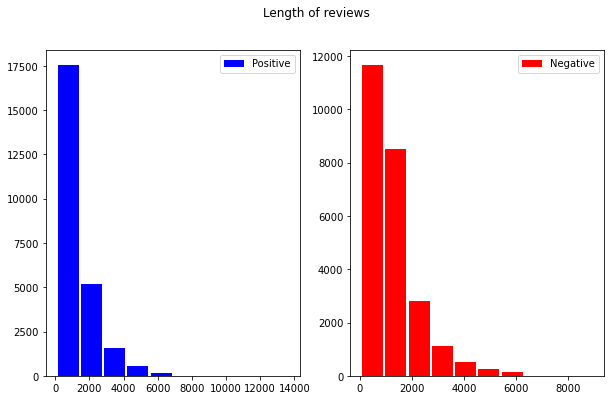

In [24]:
fig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].hist(data[data['sentiment']=='positive']['review'].str.len(),label='Positive',color='blue',rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(data[data['sentiment']=='negative']['review'].str.len(),label='Negative',color='red',rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle('Length of reviews')
plt.show()

In [25]:
#converting target column into numerical format
data.sentiment.replace("positive",1,inplace=True)
data.sentiment.replace("negative",0,inplace=True)

In [26]:
data.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


# Natural Language Processing

#     1)Data Cleaning

In [27]:
from nltk.tokenize import sent_tokenize, word_tokenize
def data_processing(text):
    text=text.lower()
    text=re.sub('<br />','',text)
    text=re.sub(r"https\S+|www\S+|http\S+",'',text,flags=re.MULTILINE)
    text=re.sub(r'\@w+|\#','',text)
    text=re.sub(r'[^\w\s]','',text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stopwords]
    return " ".join(filtered_text)

     def data_processing(text):  
    text=text.lower()    #performs lower case conversion.
    text=re.sub('<br />','',text)      #removing break tags
    text=re.sub(r"https\S+|www\S+|http\S+",'',text,flags=re.MULTILINE)   #removing URL's
    text=re.sub(r'\@w+|\#','',text)    #removing special characters
    text=re.sub(r'[^\w\s]','',text)    #removing special characters
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stop_words]   #removing stop_words
    return " ".join(filtered_text)    #returing processed data

In [28]:
data['review']=data['review'].apply(data_processing)

In [29]:
data.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,0,138
4,petter matteis love time money visually stunni...,1,230


In [30]:
duplicated_count=data.duplicated().sum()
print('Number of duplicate entries: ',duplicated_count)

Number of duplicate entries:  421


In [31]:
#Removing duplicate entries
data=data.drop_duplicates('review')

In [32]:
#stemming
stemmer=PorterStemmer()
def stemming(data):
    text=[stemmer.stem(word) for word in data]
    return data

In [33]:
data.review=data['review'].apply(lambda x: stemming(x))

C:\Users\rikin\AppData\Local\Temp\ipykernel_12768\3601513292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review=data['review'].apply(lambda x: stemming(x))


In [34]:
data['word_count']=data['review'].apply(no_of_words)

C:\Users\rikin\AppData\Local\Temp\ipykernel_12768\283973061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['word_count']=data['review'].apply(no_of_words)


In [35]:
data.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [36]:
for i in range(5):#printing first 5 pre-processed reviews
    print('Review: ',[i])
    print(data['review'].iloc[i],"\n")
    print('Sentiment: ',data['sentiment'].iloc[i],'\n\n')

Review:  [0]
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mann

# Visualizing Positive and Negative Reviews

In [37]:
pos_reviews=data[data.sentiment==1]
pos_reviews.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [39]:
from collections import Counter
count=Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word]+=1
count.most_common(20)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971),
 ('first', 8818),
 ('films', 8433),
 ('love', 8363),
 ('people', 8333),
 ('best', 8268)]

In [2]:
pos_words=pd.DataFrame(count.most_common(20))
pos_words.columns=['Word','Count']
pos_words.head()

NameError: name 'pd' is not defined

In [3]:
import plotly.express as px
px.bar(pos_words,x='Count',y='Word',title='Common words in positive reviews',color='Word')

NameError: name 'pos_words' is not defined

In [42]:
neg_reviews=data[data.sentiment==0]
neg_reviews.head()

,review,sentiment,word_count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


In [43]:
from collections import Counter
count=Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word]+=1
count.most_common(20)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563),
 ('people', 8988),
 ('could', 8917),
 ('make', 8901),
 ('made', 8299),
 ('movies', 8284)]

In [44]:
neg_words=pd.DataFrame(count.most_common(20))
neg_words.columns=['Word','Count']
neg_words.head()

,Word,Count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [1]:
px.bar(neg_words,x='Count',y='Word',title='Common words in negative reviews',color='Word')

NameError: name 'px' is not defined

In [46]:
%%time 
#progress indicator

tqdm.pandas()

CPU times: total: 0 ns
Wall time: 0 ns


# 2) Feature Extraction using TF-IDF

In [47]:
X=data['review']
Y=data['sentiment']

In [48]:
X

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 49578, dtype: object

In [49]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(X,Y,test_size=0.2,random_state=37)

In [50]:
x_train_1.info()

<class 'pandas.core.series.Series'>
Int64Index: 39662 entries, 12915 to 34908
Series name: review
Non-Null Count  Dtype 
--------------  ----- 
39662 non-null  object
dtypes: object(1)
memory usage: 619.7+ KB


In [51]:
x_train_1

12915    knew dowdy queen victoria plump monarch virtua...
42455    spoilers since disappearance sea favorite niec...
8016     recently saw documentary revolution televised ...
44994    famous ninja movie isnt nice movie want see ni...
34936    masterpiece footage bw 35mm film film makes se...
                               ...                        
988      stephane audran eponymous heroine beautifully ...
31139    elderbush gilch big disappointment id heared g...
9050     traffik really well done 6 hour drama drugs ci...
20921    film essentially little introduction hiphop sp...
34908    thought daring representation old hokey tarzan...
Name: review, Length: 39662, dtype: object

In [52]:
x_test_1

30562    strange yet somehow impressive story love pers...
17443    based selfserving novel onetime girl friend gr...
33164    spoilers often hollywoods shakespeare adaptati...
48903    unfunny unworthy picture undeserving end peter...
29001    excellent movie several parts movie liked movi...
                               ...                        
47102    talk creepy really want sit watch episode girl...
13613    film greatthe plot preposterousthe action sequ...
21279    saw mill valley film festival hard believe ms ...
2123     film wife entertaining blocbuster violent thri...
35437    chris andre two average ordinary teens misunde...
Name: review, Length: 9916, dtype: object

In [53]:
Y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 49578, dtype: int64

In [54]:
X.info()

<class 'pandas.core.series.Series'>
Int64Index: 49578 entries, 0 to 49999
Series name: review
Non-Null Count  Dtype 
--------------  ----- 
49578 non-null  object
dtypes: object(1)
memory usage: 774.7+ KB


    TF-IDF Vectorizer

In [55]:
vect=TfidfVectorizer()
X_tv=vect.fit_transform(X)

In [56]:
x_train_tv,x_test_tv,y_train_tv,y_test_tv=train_test_split(X_tv,Y,test_size=0.2,random_state=37)

In [57]:
X_tv

<49578x221707 sparse matrix of type '<class 'numpy.float64'>'
	with 4938752 stored elements in Compressed Sparse Row format>

     Data Split into Training & Testing Datasets

In [58]:
x_train_tv

<39662x221707 sparse matrix of type '<class 'numpy.float64'>'
	with 3952747 stored elements in Compressed Sparse Row format>

In [59]:
x_test_tv

<9916x221707 sparse matrix of type '<class 'numpy.float64'>'
	with 986005 stored elements in Compressed Sparse Row format>

In [60]:
pd.DataFrame.sparse.from_spmatrix(x_train_tv,columns=vect.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,00,000,0000000000001,00000001,000001,0001,00015,001,0010,002,...,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
#pd.DataFrame.sparse.from_spmatrix(x_test_tv,columns=vect.get_feature_names())

In [62]:
print("Size of x_train:  ", (x_train_tv.shape))
print("Size of y_train:  ", (y_train_tv.shape))
print("Size of x_test:  ", (x_test_tv.shape))
print("Size of y_test:  ", (y_test_tv.shape))

Size of x_train:   (39662, 221707)
Size of y_train:   (39662,)
Size of x_test:   (9916, 221707)
Size of y_test:   (9916,)


# ML Modelling

#     Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [64]:
# train a Logistic Regression Model
logreg= LogisticRegression(max_iter = 1000)

In [65]:
logreg.fit(x_train_tv,y_train_tv)

LogisticRegression(max_iter=1000)

In [66]:
# evaluate the classifier on the test set
y_pred_tv = logreg.predict(x_test_tv)

In [67]:
y_pred_tv

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [68]:
y_test_tv

30562    1
17443    0
33164    0
48903    0
29001    1
        ..
47102    0
13613    1
21279    1
2123     1
35437    1
Name: sentiment, Length: 9916, dtype: int64

In [69]:
acc_tv = accuracy_score(y_test_tv, y_pred_tv)
print("Accuracy:", acc_tv)

Accuracy: 0.8962283178701089


<AxesSubplot:>

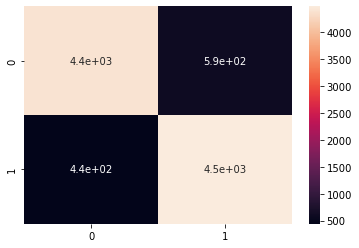

In [70]:
cm_tv = confusion_matrix(y_test_tv, y_pred_tv)
sns.heatmap(cm_tv, annot=True)

In [71]:
print("\n")
print(classification_report(y_test_tv,y_pred_tv))



              precision    recall  f1-score   support

           0       0.91      0.88      0.90      4990
           1       0.88      0.91      0.90      4926

    accuracy                           0.90      9916
   macro avg       0.90      0.90      0.90      9916
weighted avg       0.90      0.90      0.90      9916



#     Using Hyperparameter tuning 

In [72]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
param_grid={"C": loguniform(1e-3,1e3),"class_weight":['balanced',None]}
clf=LogisticRegression()

In [73]:
random_search=RandomizedSearchCV(
    clf,
    param_grid,
    n_iter=25,
    verbose=1,
    n_jobs=-1,
    random_state=123,
    return_train_score=True,
    error_score='raise'
)
random_result=random_search.fit(x_train_tv,y_train_tv)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [74]:
print(random_result.best_score_, random_result.best_params_)

0.8961726420445462 {'C': 5.806334557802442, 'class_weight': None}


#     Multinomial Naive Bayes Model

In [75]:
# train a Multinomial Naive Baye's Model
mulNB= MultinomialNB()

In [76]:
mulNB.fit(x_train_tv,y_train_tv)

MultinomialNB()

In [77]:
# evaluate the classifier on the test set
y_pred_tv = mulNB.predict(x_test_tv)

In [78]:
y_pred_tv

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [79]:
y_test_tv

30562    1
17443    0
33164    0
48903    0
29001    1
        ..
47102    0
13613    1
21279    1
2123     1
35437    1
Name: sentiment, Length: 9916, dtype: int64

In [80]:
acc_tv = accuracy_score(y_test_tv, y_pred_tv)
print("Accuracy:", acc_tv)

Accuracy: 0.8720250100847116


<AxesSubplot:>

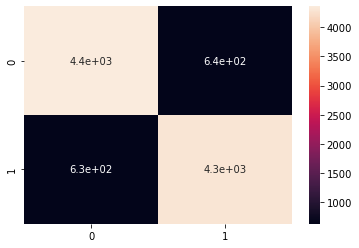

In [81]:
cm_tv = confusion_matrix(y_test_tv, y_pred_tv)
sns.heatmap(cm_tv, annot=True)

In [82]:
print("\n")
print(classification_report(y_test_tv,y_pred_tv))



              precision    recall  f1-score   support

           0       0.87      0.87      0.87      4990
           1       0.87      0.87      0.87      4926

    accuracy                           0.87      9916
   macro avg       0.87      0.87      0.87      9916
weighted avg       0.87      0.87      0.87      9916



#     Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
# train a Multinomial Naive Baye's Model
rand=RandomForestClassifier()

In [85]:
rand.fit(x_train_tv,y_train_tv)

RandomForestClassifier()

In [86]:
# evaluate the classifier on the test set
y_pred_tv = rand.predict(x_test_tv)

In [87]:
y_pred_tv

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [88]:
y_test_tv

30562    1
17443    0
33164    0
48903    0
29001    1
        ..
47102    0
13613    1
21279    1
2123     1
35437    1
Name: sentiment, Length: 9916, dtype: int64

In [89]:
acc_tv = accuracy_score(y_test_tv, y_pred_tv)
print("Accuracy:", acc_tv)

Accuracy: 0.8531665994352562


<AxesSubplot:>

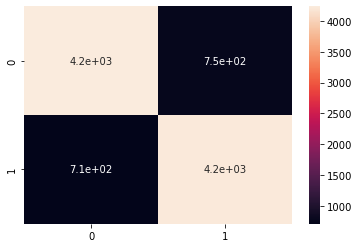

In [90]:
cm_tv = confusion_matrix(y_test_tv, y_pred_tv)
sns.heatmap(cm_tv, annot=True)

# Feature Extraction using Count_Vectorizer

In [91]:
countV=CountVectorizer()
X_cv=countV.fit_transform(X)

In [92]:
X_cv

<49578x221707 sparse matrix of type '<class 'numpy.int64'>'
	with 4938752 stored elements in Compressed Sparse Row format>

    Data Split into Training & Testing Datasets

In [93]:
x_train_cv,x_test_cv,y_train_cv,y_test_cv=train_test_split(X_cv,Y,test_size=0.2,random_state=37)

In [94]:
x_train_cv

<39662x221707 sparse matrix of type '<class 'numpy.int64'>'
	with 3952747 stored elements in Compressed Sparse Row format>

In [95]:
pd.DataFrame.sparse.from_spmatrix(x_train_cv,columns=countV.get_feature_names())

,00,000,0000000000001,00000001,000001,0001,00015,001,0010,002,...,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
pd.DataFrame.sparse.from_spmatrix(x_test_cv,columns=countV.get_feature_names())

,00,000,0000000000001,00000001,000001,0001,00015,001,0010,002,...,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
print("Size of x_train:  ", (x_train_cv.shape))
print("Size of y_train:  ", (y_train_cv.shape))
print("Size of x_test:  ", (x_test_cv.shape))
print("Size of y_test:  ", (y_test_cv.shape))

Size of x_train:   (39662, 221707)
Size of y_train:   (39662,)
Size of x_test:   (9916, 221707)
Size of y_test:   (9916,)


# ML Modelling using CountVectorizer

# Logistic Regression

In [98]:
logreg.fit(x_train_cv,y_train_cv)

LogisticRegression(max_iter=1000)

In [99]:
# evaluate the classifier on the test set
y_pred_cv = logreg.predict(x_test_cv)

In [100]:
y_pred_cv

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [101]:
y_test_cv

30562    1
17443    0
33164    0
48903    0
29001    1
        ..
47102    0
13613    1
21279    1
2123     1
35437    1
Name: sentiment, Length: 9916, dtype: int64

In [102]:
acc_cv = accuracy_score(y_test_cv, y_pred_cv)
print("Accuracy:", acc_cv)

Accuracy: 0.8876563130294474


<AxesSubplot:>

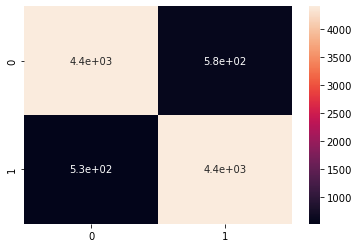

In [105]:
cm_cv = confusion_matrix(y_test_cv, y_pred_cv)
sns.heatmap(cm_cv, annot=True)

In [106]:
print("\n")
print(classification_report(y_test_cv,y_pred_cv))



              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4990
           1       0.88      0.89      0.89      4926

    accuracy                           0.89      9916
   macro avg       0.89      0.89      0.89      9916
weighted avg       0.89      0.89      0.89      9916



#    hypertuning in CountVectorizer

In [107]:
random_search=RandomizedSearchCV(
    clf,
    param_grid,
    n_iter=25,
    verbose=1,
    n_jobs=-1,
    random_state=123,
    return_train_score=True,
    error_score='raise'
)
random_resultcv=random_search.fit(x_train_cv,y_train_cv)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [108]:
print(random_resultcv.best_score_, random_resultcv.best_params_)

0.8871212758338732 {'C': 0.22527090779355338, 'class_weight': 'balanced'}


# Multinomial Naive Bayes Model

In [109]:
# train a Multinomial Naive Baye's Model
multiNB= MultinomialNB()

In [110]:
multiNB.fit(x_train_cv,y_train_cv)

MultinomialNB()

In [111]:
# evaluate the classifier on the test set
y_pred_cv = multiNB.predict(x_test_cv)

In [112]:
y_pred_cv

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [113]:
y_test_cv

30562    1
17443    0
33164    0
48903    0
29001    1
        ..
47102    0
13613    1
21279    1
2123     1
35437    1
Name: sentiment, Length: 9916, dtype: int64

In [114]:
acc_cv = accuracy_score(y_test_cv, y_pred_cv)
print("Accuracy:", acc_cv)

Accuracy: 0.8628479225494151


<AxesSubplot:>

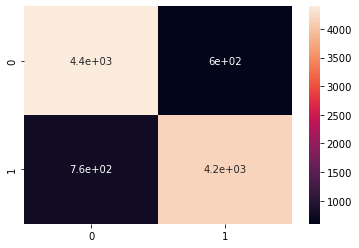

In [115]:
cm_cv = confusion_matrix(y_test_cv, y_pred_cv)
sns.heatmap(cm_cv, annot=True)

In [116]:
print("\n")
print(classification_report(y_test_cv,y_pred_cv))



              precision    recall  f1-score   support

           0       0.85      0.88      0.87      4990
           1       0.87      0.85      0.86      4926

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916



#     Random using count vectorizer

In [117]:
# train a Multinomial Naive Baye's Model
randcv=RandomForestClassifier()

In [118]:
randcv.fit(x_train_cv,y_train_cv)

RandomForestClassifier()

In [119]:
# evaluate the classifier on the test set
y_pred_cv = randcv.predict(x_test_cv)

In [120]:
y_test_cv

30562    1
17443    0
33164    0
48903    0
29001    1
        ..
47102    0
13613    1
21279    1
2123     1
35437    1
Name: sentiment, Length: 9916, dtype: int64

In [121]:
acc_cv = accuracy_score(y_test_cv, y_pred_cv)
print("Accuracy:", acc_cv)

Accuracy: 0.8554860830980234


Accuarcy of all 3 models


                         TF-IDF        CountVectorizer 
                         
        
         Logistic      |   0.90       |    0.89       |
        
         MultinomialNB |   0.87       |    0.86       |
        
         RandomForest  |   0.85       |    0.86       |

In [160]:
import pickle as pkl

In [161]:
file_path_model='model_lr.pkl'

In [162]:
file_path_tfidf = 'tfidf.pkl'

In [163]:
pkl.dump(logreg,open(file_path_model,'wb'))

In [164]:
pkl.dump(vect,open(file_path_tfidf,'wb'))

In [165]:
loaded_model=pkl.load(open('model_lr.pkl','rb'))
loaded_tfidf=pkl.load(open('tfidf.pkl','rb'))

In [166]:
x_test_1 = pd.read_excel('movie_reviews.xlsx')['review']

### Test Pipeline

In [167]:
x_test_1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 199 entries, 0 to 198
Series name: review
Non-Null Count  Dtype 
--------------  ----- 
199 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [168]:
x_test= loaded_tfidf.transform(x_test_1)

In [169]:
x_test

<199x221707 sparse matrix of type '<class 'numpy.float64'>'
	with 20306 stored elements in Compressed Sparse Row format>

In [170]:
pd.DataFrame.sparse.from_spmatrix(x_test,columns=loaded_tfidf.get_feature_names())

,00,000,0000000000001,00000001,000001,0001,00015,001,0010,002,...,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
y_pred= loaded_model.predict(x_test)

In [172]:
y_pred.size

199

In [173]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1], dtype=int64)

In [175]:
abc= pd.read_excel('sample37.xlsx')['review']

In [176]:
abc

0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
3     Basically there's a family where a little boy ...
4     Petter Mattei's "Love in the Time of Money" is...
                            ...                        
94    I watched this series out of curiosity,wanting...
95    Daniel Day-Lewis is the most versatile actor a...
96    My guess would be this was originally going to...
97    Well, I like to watch bad horror B-Movies, cau...
98    This IS the worst movie I have ever seen, as w...
Name: review, Length: 99, dtype: object

In [178]:
x_test_9= pd.read_excel('sample37.xlsx')['review']

In [179]:
x_test_9.info()

<class 'pandas.core.series.Series'>
RangeIndex: 99 entries, 0 to 98
Series name: review
Non-Null Count  Dtype 
--------------  ----- 
99 non-null     object
dtypes: object(1)
memory usage: 920.0+ bytes


In [180]:
x_test1= loaded_tfidf.transform(x_test_2)

In [181]:
x_test1

<99x221707 sparse matrix of type '<class 'numpy.float64'>'
	with 9818 stored elements in Compressed Sparse Row format>

In [182]:
pd.DataFrame.sparse.from_spmatrix(x_test1,columns=loaded_tfidf.get_feature_names())

,00,000,0000000000001,00000001,000001,0001,00015,001,0010,002,...,überwoman,ünel,ünfaithful,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
x_test_2=pd.read_csv('sample37.csv')['review']

In [184]:
x_test_2

0     One of the other reviewers has mentioned that ...
1     A wonderful little production. <br /><br />The...
2     I thought this was a wonderful way to spend ti...
3     Basically there's a family where a little boy ...
4     Petter Mattei's "Love in the Time of Money" is...
                            ...                        
94    I watched this series out of curiosity,wanting...
95    Daniel Day-Lewis is the most versatile actor a...
96    My guess would be this was originally going to...
97    Well, I like to watch bad horror B-Movies, cau...
98    This IS the worst movie I have ever seen, as w...
Name: review, Length: 99, dtype: object

In [185]:
x_test1= loaded_tfidf.transform(x_test_2)

In [186]:
y_pred1= loaded_model.predict(x_test1)

In [187]:
y_pred1

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [188]:
y_pred1.size

99

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
Name: review, dtype: object

array([1, 1, 1, 0, 1, 1, 1, 0, 0])

9

In [189]:
import pandas as pd
import pickle as pkl

# Load trained model and vectorizer
file_path_model = 'model_lr.pkl'
file_path_tfidf = 'tfidf.pkl'
loaded_model = pkl.load(open(file_path_model, 'rb'))
loaded_tfidf = pkl.load(open(file_path_tfidf, 'rb'))

# Load test data
x_test_2 = pd.read_csv('sample37.csv')['review']

# Transform test data using vectorizer
x_test1 = loaded_tfidf.transform(x_test_2)

# Make predictions using trained model
y_pred1 = loaded_model.predict(x_test1)

# Mapping function to convert labels to sentiment
def map_sentiment(label):
    if label == 0:
        return 'negative'
    else:
        return 'positive'

# Apply mapping function to predicted labels
y_pred_sentiment = [map_sentiment(label) for label in y_pred1]

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Review': x_test_2, 'Sentiment': y_pred_sentiment})

# Display results
print(results_df)


                                               Review Sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
..                                                ...       ...
94  I watched this series out of curiosity,wanting...  positive
95  Daniel Day-Lewis is the most versatile actor a...  positive
96  My guess would be this was originally going to...  negative
97  Well, I like to watch bad horror B-Movies, cau...  negative
98  This IS the worst movie I have ever seen, as w...  negative

[99 rows x 2 columns]


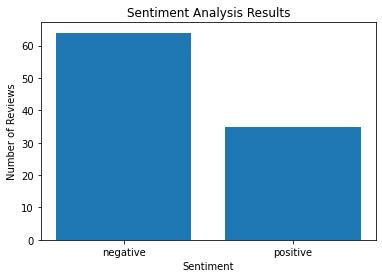

                                               Review Sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
..                                                ...       ...
94  I watched this series out of curiosity,wanting...  positive
95  Daniel Day-Lewis is the most versatile actor a...  positive
96  My guess would be this was originally going to...  negative
97  Well, I like to watch bad horror B-Movies, cau...  negative
98  This IS the worst movie I have ever seen, as w...  negative

[99 rows x 2 columns]


In [190]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

# Load trained model and vectorizer
file_path_model = 'model_lr.pkl'
file_path_tfidf = 'tfidf.pkl'
loaded_model = pkl.load(open(file_path_model, 'rb'))
loaded_tfidf = pkl.load(open(file_path_tfidf, 'rb'))

# Load test data
x_test_2 = pd.read_csv('sample37.csv')['review']

# Transform test data using vectorizer
x_test1 = loaded_tfidf.transform(x_test_2)

# Make predictions using trained model
y_pred1 = loaded_model.predict(x_test1)

# Mapping function to convert labels to sentiment
def map_sentiment(label):
    if label == 0:
        return 'negative'
    else:
        return 'positive'

# Apply mapping function to predicted labels
y_pred_sentiment = [map_sentiment(label) for label in y_pred1]

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Review': x_test_2, 'Sentiment': y_pred_sentiment})

# Plot bar graph of sentiment counts
sentiment_counts = results_df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Display results
print(results_df)


Positive Word Count: 9245
Negative Word Count: 13361


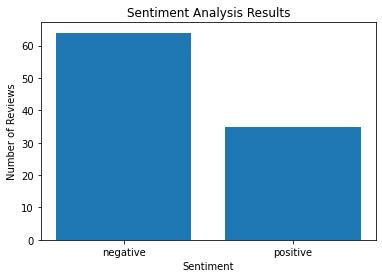

                                               Review Sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
..                                                ...       ...
94  I watched this series out of curiosity,wanting...  positive
95  Daniel Day-Lewis is the most versatile actor a...  positive
96  My guess would be this was originally going to...  negative
97  Well, I like to watch bad horror B-Movies, cau...  negative
98  This IS the worst movie I have ever seen, as w...  negative

[99 rows x 2 columns]


In [191]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

# Load trained model and vectorizer
file_path_model = 'model_lr.pkl'
file_path_tfidf = 'tfidf.pkl'
loaded_model = pkl.load(open(file_path_model, 'rb'))
loaded_tfidf = pkl.load(open(file_path_tfidf, 'rb'))

# Load test data
x_test_2 = pd.read_csv('sample37.csv')['review']

# Transform test data using vectorizer
x_test1 = loaded_tfidf.transform(x_test_2)

# Make predictions using trained model
y_pred1 = loaded_model.predict(x_test1)

# Mapping function to convert labels to sentiment
def map_sentiment(label):
    if label == 0:
        return 'negative'
    else:
        return 'positive'

# Apply mapping function to predicted labels
y_pred_sentiment = [map_sentiment(label) for label in y_pred1]

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Review': x_test_2, 'Sentiment': y_pred_sentiment})

# Calculate word counts for each sentiment
positive_word_count = 0
negative_word_count = 0

for index, row in results_df.iterrows():
    review = row['Review']
    sentiment = row['Sentiment']
    word_count = len(review.split())
    if sentiment == 'positive':
        positive_word_count += word_count
    else:
        negative_word_count += word_count

# Display word counts and plot bar graph of sentiment counts
print('Positive Word Count:', positive_word_count)
print('Negative Word Count:', negative_word_count)

sentiment_counts = results_df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Display results
print(results_df)


Positive Word Count: 9245
Negative Word Count: 13361
                                               Review Sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
..                                                ...       ...
94  I watched this series out of curiosity,wanting...  positive
95  Daniel Day-Lewis is the most versatile actor a...  positive
96  My guess would be this was originally going to...  negative
97  Well, I like to watch bad horror B-Movies, cau...  negative
98  This IS the worst movie I have ever seen, as w...  negative

[99 rows x 2 columns]


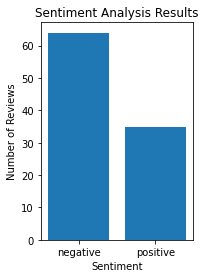

In [193]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

# Load trained model and vectorizer
file_path_model = 'model_lr.pkl'
file_path_tfidf = 'tfidf.pkl'
loaded_model = pkl.load(open(file_path_model, 'rb'))
loaded_tfidf = pkl.load(open(file_path_tfidf, 'rb'))

# Load test data
x_test_2 = pd.read_csv('sample37.csv')['review']

# Transform test data using vectorizer
x_test1 = loaded_tfidf.transform(x_test_2)

# Make predictions using trained model
y_pred1 = loaded_model.predict(x_test1)

# Mapping function to convert labels to sentiment
def map_sentiment(label):
    if label == 0:
        return 'negative'
    else:
        return 'positive'

# Apply mapping function to predicted labels
y_pred_sentiment = [map_sentiment(label) for label in y_pred1]

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Review': x_test_2, 'Sentiment': y_pred_sentiment})

# Calculate word counts for each sentiment
positive_word_count = 0
negative_word_count = 0

for index, row in results_df.iterrows():
    review = row['Review']
    sentiment = row['Sentiment']
    word_count = len(review.split())
    if sentiment == 'positive':
        positive_word_count += word_count
    else:
        negative_word_count += word_count

# Display word counts and plot bar graph of sentiment counts and word counts
print('Positive Word Count:', positive_word_count)
print('Negative Word Count:', negative_word_count)

sentiment_counts = results_df['Sentiment'].value_counts()
plt.subplot(1,2,1)
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')


# Display results
print(results_df)


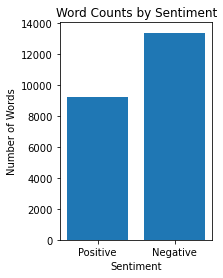

In [194]:
word_counts = [positive_word_count, negative_word_count]
plt.subplot(1,2,2)
plt.bar(['Positive', 'Negative'], word_counts)
plt.title('Word Counts by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()


Positive Word Count: 9245
Negative Word Count: 13361
Positive Comment Word Count: 44


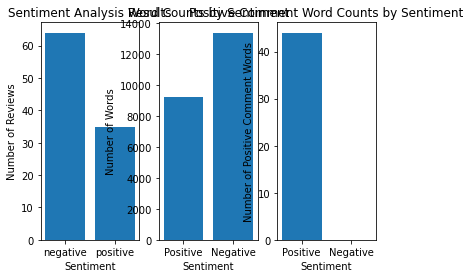

                                               Review Sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
..                                                ...       ...
94  I watched this series out of curiosity,wanting...  positive
95  Daniel Day-Lewis is the most versatile actor a...  positive
96  My guess would be this was originally going to...  negative
97  Well, I like to watch bad horror B-Movies, cau...  negative
98  This IS the worst movie I have ever seen, as w...  negative

[99 rows x 2 columns]


In [199]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

# Load trained model and vectorizer
file_path_model = 'model_lr.pkl'
file_path_tfidf = 'tfidf.pkl'
loaded_model = pkl.load(open(file_path_model, 'rb'))
loaded_tfidf = pkl.load(open(file_path_tfidf, 'rb'))

# Load test data
x_test_2 = pd.read_csv('sample37.csv')['review']

# Transform test data using vectorizer
x_test1 = loaded_tfidf.transform(x_test_2)

# Make predictions using trained model
y_pred1 = loaded_model.predict(x_test1)

# Mapping function to convert labels to sentiment
def map_sentiment(label):
    if label == 0:
        return 'negative'
    else:
        return 'positive'

# Apply mapping function to predicted labels
y_pred_sentiment = [map_sentiment(label) for label in y_pred1]

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Review': x_test_2, 'Sentiment': y_pred_sentiment})

# Define positive comment words
positive_comment_words = ['good', 'great', 'excellent', 'awesome', 'fantastic', 'amazing', 'love']

# Calculate word counts and positive comment word counts for each sentiment
positive_word_count = 0
negative_word_count = 0
positive_comment_word_count = 0

for index, row in results_df.iterrows():
    review = row['Review']
    sentiment = row['Sentiment']
    word_count = len(review.split())
    if sentiment == 'positive':
        positive_word_count += word_count
        for word in review.split():
            if word.lower() in positive_comment_words:
                positive_comment_word_count += 1
    else:
        negative_word_count += word_count

# Display word counts and plot bar graph of sentiment counts and word counts
print('Positive Word Count:', positive_word_count)
print('Negative Word Count:', negative_word_count)
print('Positive Comment Word Count:', positive_comment_word_count)

sentiment_counts = results_df['Sentiment'].value_counts()
plt.subplot(1,3,1)
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')

word_counts = [positive_word_count, negative_word_count]
plt.subplot(1,3,2)
plt.bar(['Positive', 'Negative'], word_counts)
plt.title('Word Counts by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')

comment_word_counts = [positive_comment_word_count, 0]
plt.subplot(1,3,3)
plt.bar(['Positive', 'Negative'], comment_word_counts)
plt.title('Positive Comment Word Counts by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Positive Comment Words')
plt.show()

# Display results
print(results_df)


In [ ]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename

file_path_model='model_lr.pkl'
file_path_tfidf = 'tfidf.pkl'

loaded_model=pkl.load(open(file_path_model,'rb'))
loaded_tfidf=pkl.load(open(file_path_tfidf,'rb'))

def predict_sentiment():
    # Create a Tkinter root window and hide it
    root = Tk()
    root.withdraw()
    
    # Show the file dialog box and allow the user to select a file
    file_path = askopenfilename(title="Select a file", filetypes=[("CSV files", "*.csv"),("Excel files", "*.xlsx")])
    if not file_path:
        print("No file selected.")
        return
    
    # Load the file into a pandas DataFrame
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        print("Invalid file type.")
        return


Button(description='Predict sentiment', style=ButtonStyle())